In [18]:
import tensorflow as tf
import numpy as np
import keras
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from keras import optimizers, regularizers
from keras.regularizers import l2,l1
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os

In [3]:
from google.colab import drive
#drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/intel_image_classification (1)" "/content/"

In [4]:
classes = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [5]:
img = cv2.imread("/content/intel_image_classification (1)/data/train/buildings/4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
input_shape = img.shape

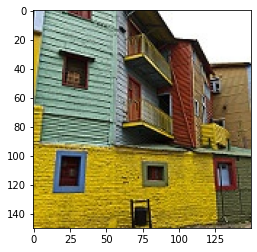

In [7]:
plt.imshow(img)

In [8]:
path = '/content/intel_image_classification (1)/'

In [9]:
#Loading data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [10]:
train_generator = train_datagen.flow_from_directory(path+'data/train',target_size=(150,150), batch_size=32, class_mode='categorical',subset = 'training')

val_generator = train_datagen.flow_from_directory(path+'data/train',target_size=(150,150), batch_size=32, class_mode='categorical',subset = 'validation')

test_generator = test_datagen.flow_from_directory(path+'data/val', target_size=(150,150), batch_size=32, class_mode='categorical')


Found 9826 images belonging to 6 classes.
Found 4208 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [13]:
baseline_model = Sequential()
baseline_model.add(InputLayer(input_shape = (150,150,3)))
baseline_model.add(Conv2D(16, (3, 3), activation = 'relu'))
baseline_model.add(Conv2D(32, (3, 3), activation = 'relu'))
baseline_model.add(MaxPooling2D(2, 2))
baseline_model.add(Conv2D(32, (3, 3), activation = 'relu'))
baseline_model.add(Conv2D(64, (3, 3), activation = 'relu'))
baseline_model.add(MaxPooling2D(2, 2))
baseline_model.add(Conv2D(64, (3, 3), activation = 'relu'))
baseline_model.add(Conv2D(128, (3, 3), activation = 'relu'))
baseline_model.add(MaxPooling2D(2, 2))
baseline_model.add(Flatten())
baseline_model.add(Dense(6,activation = 'softmax'))

In [14]:
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
checkpoint = ModelCheckpoint(path+'best_baseline', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint,es]
history = baseline_model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/50
308/308 [==============================] - ETA: 0s - loss: 1.0776 - accuracy: 0.5757 
Epoch 00001: val_accuracy improved from -inf to 0.56440, saving model to /content/intel_image_classification (1)/best_baseline
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_baseline/assets
308/308 [==============================] - 9745s 32s/step - loss: 1.0776 - accuracy: 0.5757 - val_loss: 1.0238 - val_accuracy: 0.5644
Epoch 2/50
308/308 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.6648
Epoch 00002: val_accuracy improved from 0.56440 to 0.70675, saving model to /content/intel_image_classification (1)/best_baseline
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_baseli

In [30]:
def plot_curves(history):
    fig = plt.figure(figsize=(10,8))
    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
    return

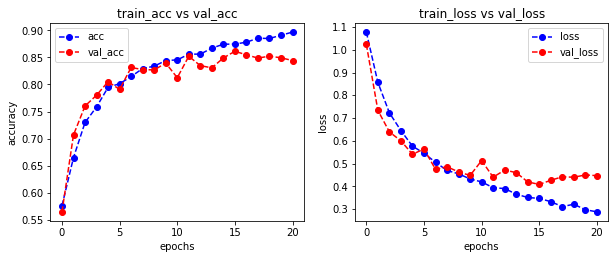

In [17]:
plot_curves(history)

In [19]:
baseline = keras.models.load_model(path+'best_baseline')
test_loss = baseline.evaluate(test_generator)

94/94 [==============================] - 1929s 21s/step - loss: 0.4371 - accuracy: 0.8480


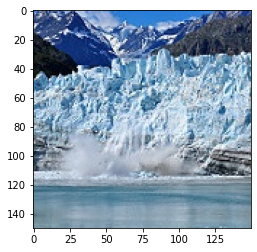

In [92]:
test_img = cv2.imread('/content/intel_image_classification (1)/data/val/glacier/22254.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [93]:
test_img = np.reshape(test_img,(1,150,150,3))

In [94]:
pred = (baseline.predict(test_img))

In [95]:
print(classes[pred.argmax()])

glacier


Pretrained Models

VGG16

In [33]:
from keras.applications.vgg16 import VGG16

In [34]:
vgg = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
vgg.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [35]:
last_layer = vgg.layers[-1]
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output
flat1 = Flatten()(last_output)
d1 = Dense(50,activation='relu')(flat1)
outputs = Dense(6,activation='softmax')(d1)

vgg_model = keras.models.Model(vgg.input, outputs)
vgg_model.summary()

last layer of vgg : output shape:  (None, 4, 4, 512)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
b

In [36]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
checkpoint = ModelCheckpoint(path+'best_vgg', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
callbacks_list = [checkpoint,es]
history = vgg_model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/50
308/308 [==============================] - ETA: 0s - loss: 0.5176 - accuracy: 0.8074
Epoch 00001: val_accuracy improved from -inf to 0.85694, saving model to /content/intel_image_classification (1)/best_vgg
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_vgg/assets
308/308 [==============================] - 96s 312ms/step - loss: 0.5176 - accuracy: 0.8074 - val_loss: 0.3844 - val_accuracy: 0.8569
Epoch 2/50
308/308 [==============================] - ETA: 0s - loss: 0.3566 - accuracy: 0.8725
Epoch 00002: val_accuracy did not improve from 0.85694
308/308 [==============================] - 94s 306ms/step - loss: 0.3566 - accuracy: 0.8725 - val_loss: 0.4062 - val_accuracy: 0.8489
Epoch 3/50
308/308 [==============================] - ETA: 0s - loss: 0.3269 - accuracy: 0.8783
Epoch 00003: val_accuracy did not improve from 0.85694
308/308 [==============================] - 94s 305ms/step - loss: 0.3269 - accuracy: 0.8783 - val_loss: 0.3933 - val_accu

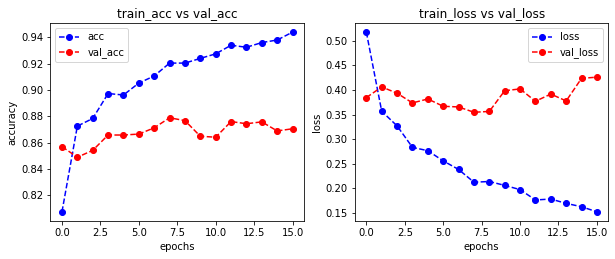

In [38]:
plot_curves(history)

In [39]:
model = keras.models.load_model(path+'best_vgg')
test_loss = model.evaluate(test_generator)

94/94 [==============================] - 19s 202ms/step - loss: 0.3717 - accuracy: 0.8660


InceptionNet

In [40]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [41]:
inception_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = "imagenet")
inception_model.trainable = False
inception_model.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [42]:
last_layer  = inception_model.layers[-1]
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)               
x = layers.Dense(6, activation='softmax')(x) 
model_inception = Model(inception_model.input, x)

model_inception.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

last layer output shape:  (None, 3, 3, 2048)


In [43]:
checkpoint = ModelCheckpoint(path+'best_incep', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
callbacks_list = [checkpoint,es]
history = model_inception.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/50
308/308 [==============================] - ETA: 0s - loss: 1.7460 - accuracy: 0.8180
Epoch 00001: val_accuracy improved from -inf to 0.83294, saving model to /content/intel_image_classification (1)/best_incep
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_incep/assets
308/308 [==============================] - 119s 385ms/step - loss: 1.7460 - accuracy: 0.8180 - val_loss: 0.5098 - val_accuracy: 0.8329
Epoch 2/50
308/308 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8842
Epoch 00002: val_accuracy improved from 0.83294 to 0.88094, saving model to /content/intel_image_classification (1)/best_incep
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_incep/assets
308/308 [==============================] - 116s 377ms/step - loss: 0.3226 - accuracy: 0.8842 - val_loss: 0.3451 - val_accuracy: 0.8809
Epoch 3/50
308/308 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8953
Epoch

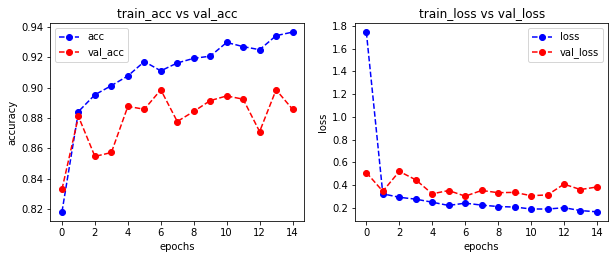

In [44]:
plot_curves(history)

In [45]:
model = keras.models.load_model(path+'best_incep')
test_loss = model.evaluate(test_generator)

94/94 [==============================] - 18s 194ms/step - loss: 0.3107 - accuracy: 0.8920


ResNet 50

In [20]:
from tensorflow.keras.applications import ResNet50


resnet50=ResNet50( input_shape=(150,150,3), include_top=False, weights='imagenet')

resnet50.trainable = False
resnet50.summary()

                                   

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [21]:
last_layer = resnet50.layers[-1]
last_output = last_layer.output
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 5, 5, 2048)


In [23]:
f1 = Flatten()(last_output)
d1 = Dense(1024,activation='relu')(f1)
outputs = Dense(6,activation='softmax')(d1)

resnet_model = keras.models.Model(resnet50.input,outputs)
resnet_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [26]:
resnet_model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [27]:
checkpoint = ModelCheckpoint(path+'best_resnet', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint,es]
history = resnet_model.fit(train_generator, epochs=5, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/5
308/308 [==============================] - ETA: 0s - loss: 1.6841 - accuracy: 0.4416
Epoch 00001: val_accuracy improved from -inf to 0.60646, saving model to /content/intel_image_classification (1)/best_resnet
INFO:tensorflow:Assets written to: /content/intel_image_classification (1)/best_resnet/assets
308/308 [==============================] - 117s 378ms/step - loss: 1.6841 - accuracy: 0.4416 - val_loss: 1.0333 - val_accuracy: 0.6065
Epoch 2/5
308/308 [==============================] - ETA: 0s - loss: 1.0528 - accuracy: 0.5791
Epoch 00002: val_accuracy did not improve from 0.60646
308/308 [==============================] - 96s 311ms/step - loss: 1.0528 - accuracy: 0.5791 - val_loss: 1.0552 - val_accuracy: 0.5692
Epoch 3/5
308/308 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.5991
Epoch 00003: val_accuracy improved from 0.60646 to 0.62476, saving model to /content/intel_image_classification (1)/best_resnet
INFO:tensorflow:Assets written to: /content/

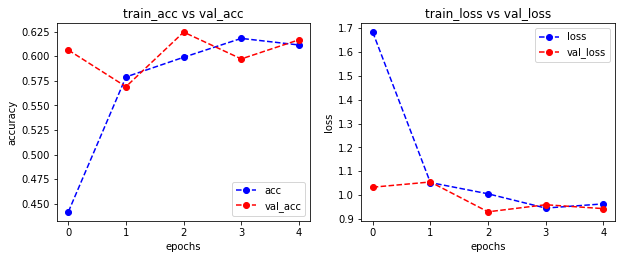

In [31]:
plot_curves(history)

In [28]:
model = keras.models.load_model(path+'best_resnet')
test_loss = model.evaluate(test_generator)

94/94 [==============================] - 21s 220ms/step - loss: 0.9391 - accuracy: 0.6263
